<a href="https://colab.research.google.com/github/tangxuanzang/data-science-competition/blob/main/%E5%A4%A9%E6%B1%A0/suichang2021/using%20keras-segmentation%20library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intelligent analysis of ecological assets: Using Keras-Segmentation Library

2021全国数字生态创新大赛——智能算法赛：生态资产智能分析 [赛事链接](https://tianchi.aliyun.com/competition/entrance/531860/introduction?spm=5176.21174431.J_3123622140.1.63d5fafbvoMuzd)<br>
Source Github Link: https://github.com/divamgupta/image-segmentation-keras

![slogan](https://github.com/tangxuanzang/data-science-competition/blob/main/%E5%A4%A9%E6%B1%A0/suichang2021/assets/slogan.jpeg?raw=1)

# Setup

In [1]:
!git clone https://github.com/divamgupta/image-segmentation-keras
%cd image-segmentation-keras
!python setup.py install
!cd ..

Cloning into 'image-segmentation-keras'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1036 (delta 4), reused 1 (delta 0), pack-reused 1026
Receiving objects: 100% (1036/1036), 3.26 MiB | 43.94 MiB/s, done.
Resolving deltas: 100% (654/654), done.
/content/image-segmentation-keras
running install
running bdist_egg
running egg_info
creating keras_segmentation.egg-info
writing keras_segmentation.egg-info/PKG-INFO
writing dependency_links to keras_segmentation.egg-info/dependency_links.txt
writing entry points to keras_segmentation.egg-info/entry_points.txt
writing requirements to keras_segmentation.egg-info/requires.txt
writing top-level names to keras_segmentation.egg-info/top_level.txt
writing manifest file 'keras_segmentation.egg-info/SOURCES.txt'
writing manifest file 'keras_segmentation.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_li

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/Datasets/suichang_round1_train.zip ./suichang_round1_train.zip
!cp drive/MyDrive/Datasets/suichang_round1_test_partA.zip ./suichang_round1_test_partA.zip

In [12]:
!unzip -d ./ ./suichang_round1_train_210120.zip
!unzip -d ./ ./suichang_round1_test_partA_210120.zip
# !rm -rf suichang_round1_test_partA.zip suichang_round1_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: ./suichang_round1_train_210120/015018.tif  
  inflating: ./suichang_round1_train_210120/015019.png  
  inflating: ./suichang_round1_train_210120/015019.tif  
  inflating: ./suichang_round1_train_210120/015020.png  
  inflating: ./suichang_round1_train_210120/015020.tif  
  inflating: ./suichang_round1_train_210120/015021.png  
  inflating: ./suichang_round1_train_210120/015021.tif  
  inflating: ./suichang_round1_train_210120/015022.png  
  inflating: ./suichang_round1_train_210120/015022.tif  
  inflating: ./suichang_round1_train_210120/015023.png  
  inflating: ./suichang_round1_train_210120/015023.tif  
  inflating: ./suichang_round1_train_210120/015024.png  
  inflating: ./suichang_round1_train_210120/015024.tif  
  inflating: ./suichang_round1_train_210120/015025.png  
  inflating: ./suichang_round1_train_210120/015025.tif  
  inflating: ./suichang_round1_train_210120/015026.png  
  inflating: ./suichang_round1_train_

In [20]:
!mkdir suichang_round1_train_210120/original_images suichang_round1_train_210120/segmentation
!mv suichang_round1_train_210120/*.tif suichang_round1_train_210120/original_images/
!mv suichang_round1_train_210120/*.png suichang_round1_train_210120/segmentation

mkdir: cannot create directory ‘suichang_round1_train_210120/original_images’: File exists
mkdir: cannot create directory ‘suichang_round1_train_210120/segmentation’: File exists
mv: cannot stat 'suichang_round1_train_210120/*.png': No such file or directory


# Prepare Dataset

## Convert RGBA to RGB

In [ ]:
import os
from pathlib import Path

from PIL import Image
from tqdm import tqdm

# Change the path of root before run this notebook
# root = Path('E:/Datasets/suichang_round1')
root = Path('./')
original_img_dir = root / 'suichang_round1_train/original_images'
rgb_img_dir = Path('./rgb_images')
if not os.path.exists(rgb_img_dir):
    os.makedirs(rgb_img_dir)
    
img_names = os.listdir(original_img_dir)
for img_name in tqdm(img_names):
    img_path = original_img_dir / img_name
    img = Image.open(img_path).convert('RGB')
    img.save(rgb_img_dir / (img_name.split('.')[0] + '.jpg'))

100%|██████████| 16017/16017 [01:00<00:00, 266.93it/s]


## Convert segmentation from [1-10] to [0-9]

In [ ]:
import numpy as np

seg_dir = root / 'suichang_round1_train/segmentation'
out_seg_dir = Path('./converted_seg')
if not os.path.exists(out_seg_dir):
    os.makedirs(out_seg_dir)

seg_fnames = os.listdir(seg_dir)

for seg_fname in tqdm(seg_fnames):
    seg_fpath = seg_dir / seg_fname
    img = Image.open(seg_fpath)
    img = Image.fromarray(np.asarray(img) - 1)
    img.save(out_seg_dir / seg_fname)

100%|██████████| 16017/16017 [00:30<00:00, 518.78it/s]


## Have a glance

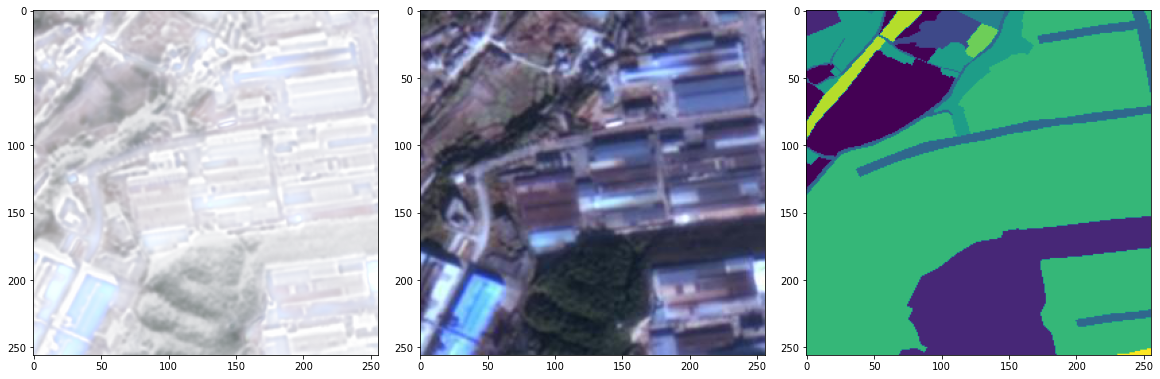

In [ ]:
import matplotlib.pyplot as plt
import random

rand_number = random.randint(1, 16017) 
original_img = root / 'suichang_round1_train' / ('original_images/%06d.tif' % rand_number)
rgb_img = rgb_img_dir / ('%06d.jpg' % rand_number)
seg_img = out_seg_dir / ('%06d.png' % rand_number)

fig, axs = plt.subplots(1, 3, figsize=(16, 8), constrained_layout=True)

axs[0].imshow(Image.open(original_img))
axs[0].grid(False)

axs[1].imshow(Image.open(rgb_img))
axs[1].grid(False)

axs[2].imshow(Image.open(seg_img))
axs[2].grid(False)

# Train

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=10, input_height=256, input_width=256)

model.train(
    train_images='./rgb_images/',
    train_annotations='./converted_seg/',
    # checkpoints_path='./resnet50_unet_config.json',
    epochs=300,
)

58892288/58889256 [==============================] - 2s 0us/step
Verifying training dataset


100%|██████████| 16017/16017 [00:19<00:00, 836.27it/s]
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Dataset verified! 
Epoch 1/300
512/512 [==============================] - 43s 66ms/step - loss: 2.7367 - accuracy: 0.1138
Epoch 2/300
512/512 [==============================] - 35s 69ms/step - loss: 2.4040 - accuracy: 0.2463
Epoch 3/300
512/512 [==============================] - 37s 72ms/step - loss: 2.2151 - accuracy: 0.3615
Epoch 4/300
512/512 [==============================] - 36s 71ms/step - loss: 2.0867 - accuracy: 0.4552
Epoch 5/300
512/512 [==============================] - 36s 71ms/step - loss: 2.0226 - accuracy: 0.5011
Epoch 6/300
512/512 [==============================] - 36s 71ms/step - loss: 1.9776 - accuracy: 0.5313
Epoch 7/300
512/512 [==============================] - 36s 71ms/step - loss: 1.9126 - accuracy: 0.5620
Epoch 8/300
512/512 [==============================] - 36s 71ms/step - loss: 1.8668 - accuracy: 0.5759
Epoch 9/300
512/512 [==============================] - 36s 71ms/step - loss: 1.8538 - accuracy: 0.5852
Epoch 10/300
512/512 [==============================] 

# Prediction

## Convert test data

In [ ]:
test_img_dir = root / 'suichang_round1_test_partA'
out_test_dir = Path('./test_images')
if not os.path.exists(out_test_dir):
  os.makedirs(out_test_dir)

for img_name in tqdm(os.listdir(test_img_dir)):
  img_path = test_img_dir / img_name
  img = Image.open(img_path).convert('RGB')
  img.save(out_test_dir / (img_name.split('.')[0] + '.jpg'))

100%|██████████| 3000/3000 [00:08<00:00, 346.82it/s]


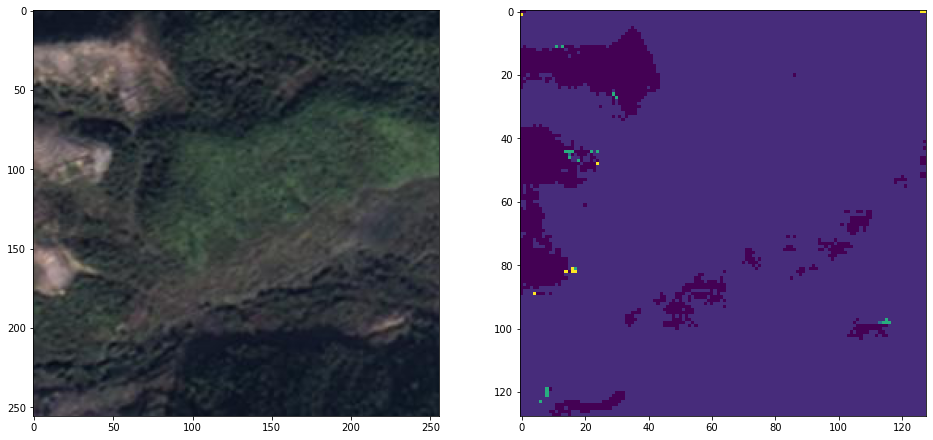

In [ ]:
predict = model.predict_segmentation(str(out_test_dir / '000002.jpg'), prediction_height=256, prediction_width=256, \
                                     colors=[(0,0,1),(0,0,2),(0,0,3),(0,0,4),(0,0,5),(0,0,6),(0,0,7),(0,0,8),(0,0,9),(0,0,10)])

predict[0] + 1
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(Image.open(out_test_dir / '000002.jpg'))

axs[1].imshow(predict)

In [ ]:
predict_dir = Path('./results')
if not os.path.exists(predict_dir):
  os.makedirs(predict_dir)

for img_name in tqdm(os.listdir(out_test_dir)):
  img_path = out_test_dir / img_name
  out_path = predict_dir / (img_name.split('.')[0] + '.png')
  model.predict_segmentation(str(img_path), out_fname=str(out_path), colors=[(0,0,1),(0,0,2),(0,0,3),(0,0,4),(0,0,5),(0,0,6),(0,0,7),(0,0,8),(0,0,9),(0,0,10)])

  img = np.asarray(Image.open(out_path))
  img = Image.fromarray(np.sum(img, axis=2, dtype='uint8'))
  img.save(out_path)



100%|██████████| 3000/3000 [02:49<00:00, 17.67it/s]


In [ ]:
!zip results.zip results/*

  adding: results/000001.png (deflated 39%)
  adding: results/000002.png (deflated 1%)
  adding: results/000003.png (stored 0%)
  adding: results/000004.png (stored 0%)
  adding: results/000005.png (stored 0%)
  adding: results/000006.png (deflated 28%)
  adding: results/000007.png (stored 0%)
  adding: results/000008.png (deflated 2%)
  adding: results/000009.png (stored 0%)
  adding: results/000010.png (stored 0%)
  adding: results/000011.png (stored 0%)
  adding: results/000012.png (stored 0%)
  adding: results/000013.png (stored 0%)
  adding: results/000014.png (stored 0%)
  adding: results/000015.png (deflated 13%)
  adding: results/000016.png (stored 0%)
  adding: results/000017.png (stored 0%)
  adding: results/000018.png (stored 0%)
  adding: results/000019.png (deflated 32%)
  adding: results/000020.png (stored 0%)
  adding: results/000021.png (stored 0%)
  adding: results/000022.png (stored 0%)
  adding: results/000023.png (stored 0%)
  adding: results/000024.png (stored 0%)


In [ ]:
!rm -rf suichang

In [ ]:
!zip model_100epochs.zip model_100epochs/* -r

updating: model_100epochs/assets/ (stored 0%)
updating: model_100epochs/saved_model.pb (deflated 90%)
updating: model_100epochs/variables/ (stored 0%)
  adding: model_100epochs/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model_100epochs/variables/variables.index (deflated 76%)
